# Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys
import os
from utils import *

import xgboost as xgb
from boruta import BorutaPy

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

# Data Loading

In [10]:
DATA_DIR = "./data"

In [11]:
X = pd.read_csv(os.path.join(DATA_DIR, 'x_train.txt'), sep=" ", header=None)
X.columns = X.columns.astype(str)
y = np.array(pd.read_csv(os.path.join(DATA_DIR, 'y_train.txt'), header=None)[0])
X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [20]:
X_no_corr = remove_collinear_features(X, 0.8)

Removed columns: ['1', '3', '4', '5', '6', '7', '8', '9']


# Boruta

In [13]:
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)
model_xgboost = xgb.XGBClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)

## With correlation

In [14]:
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)

In [15]:
boruta_with_corr = BorutaPy(model_rf, verbose=1)
selection_with_corr = boruta_with_corr.fit(np.array(X_train), y_train)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [63]:
X.iloc[:, selection_with_corr.support_].columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '21', '100', '101',
       '102', '103', '104', '105'],
      dtype='object')

In [16]:
results_boruta_corr_RF = []
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)
for _ in tqdm(range(5)):
    X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    X_train_boruta = X_train.iloc[:, selection_with_corr.support_]
    X_val_boruta = X_val.iloc[:, selection_with_corr.support_]
    
    model_rf.fit(X_train_boruta, y_train)
    y_pred = model_rf.predict_proba(X_val_boruta)
    reward = calculate_score(X_train_boruta.shape[1]-1, y_pred, y_val)
    results_boruta_corr_RF.append(reward)

100%|██████████| 5/5 [00:01<00:00,  4.32it/s]


In [19]:
results_boruta_corr_XGB = []
for _ in tqdm(range(5)):
    model_xgboost = xgb.XGBClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)
    
    X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    X_train_boruta = X_train.iloc[:, selection_with_corr.support_]
    X_val_boruta = X_val.iloc[:, selection_with_corr.support_]

    model_xgboost.fit(X_train_boruta, y_train)
    y_pred = model_xgboost.predict_proba(X_val_boruta)
    reward = calculate_score(X_train_boruta.shape[1]-1, y_pred, y_val)
    results_boruta_corr_XGB.append(reward)

100%|██████████| 5/5 [00:00<00:00, 13.13it/s]


## Without correlation

In [21]:
boruta_without_corr = BorutaPy(model_rf, verbose=1)
X_train_no_corr, X_val_no_corr, y_train, y_val = train_test_split(X_no_corr, y, test_size=0.2)
selection_without_corr = boruta_without_corr.fit(np.array(X_train_no_corr), y_train)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [62]:
X_no_corr.iloc[:, selection_without_corr.support_].columns

Index(['0', '2', '100', '101', '102', '103', '104', '105', '285'], dtype='object')

In [22]:
X_boruta_no_corr = X_no_corr.iloc[:, selection_without_corr.support_]

In [23]:
results_boruta_no_corr_RF = []
for _ in tqdm(range(5)):
    model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)
    X_train_boruta_no_corr, X_val_boruta_no_corr, y_train, y_val = train_test_split(X_boruta_no_corr, y, test_size=0.2)
    model_rf.fit(X_train_boruta_no_corr, y_train)
    y_pred = model_rf.predict_proba(X_val_boruta_no_corr)
    reward = calculate_score(X_train_boruta_no_corr.shape[1]-1, y_pred, y_val)
    results_boruta_no_corr_RF.append(reward)

100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


In [30]:
results_boruta_no_corr_XGB = []
for _ in tqdm(range(5)):
    model_xgboost = xgb.XGBClassifier(n_estimators=100, n_jobs=-1, max_depth=2, random_state=0)
    X_train_boruta_no_corr, X_val_boruta_no_corr, y_train, y_val = train_test_split(X_boruta_no_corr, y, test_size=0.2)
    model_xgboost.fit(X_train_boruta_no_corr, y_train)
    y_pred = model_xgboost.predict_proba(X_val_boruta_no_corr)
    reward = calculate_score(X_train_boruta_no_corr.shape[1]-1, y_pred, y_val)
    results_boruta_no_corr_XGB.append(reward)

100%|██████████| 5/5 [00:00<00:00, 17.90it/s]


### Without correlation, with SFS

In [38]:
results_boruta_nocorr_RF = []
for _ in tqdm(range(5)):
    X_train_no_corr, X_val_no_corr, y_train, y_val = train_test_split(X_no_corr, y, test_size=0.2)
    results = sfs(model_rf, model_rf, selection_without_corr.support_, X_train_no_corr, X_val_no_corr, y_train, y_val)
    results_boruta_nocorr_RF.append(results)

  0%|          | 0/5 [00:00<?, ?it/s]

N of features: 8
Feature names: ['2', '100', '101', '102', '103', '104', '105', '285']
Reward: 5400.0
N of features: 7
Feature names: ['100', '101', '102', '103', '104', '105', '285']
Reward: 5850.0
N of features: 6
Feature names: ['100', '101', '102', '103', '105', '285']
Reward: 5500.0
N of features: 5
Feature names: ['100', '101', '102', '103', '105']
Reward: 6050.0
N of features: 4
Feature names: ['101', '102', '103', '105']
Reward: 5850.0
N of features: 3
Feature names: ['101', '102', '105']
Reward: 6150.0
N of features: 2
Feature names: ['101', '105']
Reward: 6450.0


 20%|██        | 1/5 [00:19<01:16, 19.14s/it]

N of features: 1
Feature names: ['105']
Reward: 5950.0
N of features: 8
Feature names: ['0', '100', '101', '102', '103', '104', '105', '285']
Reward: 5500.0
N of features: 7
Feature names: ['100', '101', '102', '103', '104', '105', '285']
Reward: 5400.0
N of features: 6
Feature names: ['100', '101', '102', '103', '105', '285']
Reward: 5600.0
N of features: 5
Feature names: ['101', '102', '103', '105', '285']
Reward: 5750.0
N of features: 4
Feature names: ['101', '102', '105', '285']
Reward: 5800.0
N of features: 3
Feature names: ['101', '102', '105']
Reward: 6200.0
N of features: 2
Feature names: ['102', '105']
Reward: 6100.0


 40%|████      | 2/5 [00:37<00:55, 18.61s/it]

N of features: 1
Feature names: ['102']
Reward: 6800.0
N of features: 8
Feature names: ['2', '100', '101', '102', '103', '104', '105', '285']
Reward: 4950.0
N of features: 7
Feature names: ['2', '100', '101', '102', '103', '104', '105']
Reward: 5800.0
N of features: 6
Feature names: ['100', '101', '102', '103', '104', '105']
Reward: 5550.0
N of features: 5
Feature names: ['100', '102', '103', '104', '105']
Reward: 5950.0
N of features: 4
Feature names: ['102', '103', '104', '105']
Reward: 5800.0
N of features: 3
Feature names: ['103', '104', '105']
Reward: 6250.0
N of features: 2
Feature names: ['103', '105']
Reward: 5900.0


 60%|██████    | 3/5 [00:55<00:37, 18.53s/it]

N of features: 1
Feature names: ['105']
Reward: 6100.0
N of features: 8
Feature names: ['0', '2', '100', '101', '102', '103', '104', '105']
Reward: 5500.0
N of features: 7
Feature names: ['2', '100', '101', '102', '103', '104', '105']
Reward: 5950.0
N of features: 6
Feature names: ['100', '101', '102', '103', '104', '105']
Reward: 6000.0
N of features: 5
Feature names: ['100', '101', '102', '103', '105']
Reward: 5950.0
N of features: 4
Feature names: ['100', '101', '102', '105']
Reward: 6200.0
N of features: 3
Feature names: ['100', '101', '105']
Reward: 6600.0
N of features: 2
Feature names: ['100', '105']
Reward: 6450.0


 80%|████████  | 4/5 [01:14<00:18, 18.43s/it]

N of features: 1
Feature names: ['105']
Reward: 6400.0
N of features: 8
Feature names: ['2', '100', '101', '102', '103', '104', '105', '285']
Reward: 5150.0
N of features: 7
Feature names: ['2', '100', '102', '103', '104', '105', '285']
Reward: 5000.0
N of features: 6
Feature names: ['2', '100', '102', '103', '104', '285']
Reward: 5200.0
N of features: 5
Feature names: ['2', '100', '102', '103', '285']
Reward: 5200.0
N of features: 4
Feature names: ['2', '100', '102', '103']
Reward: 5700.0
N of features: 3
Feature names: ['100', '102', '103']
Reward: 5950.0
N of features: 2
Feature names: ['100', '102']
Reward: 5850.0


100%|██████████| 5/5 [01:32<00:00, 18.48s/it]

N of features: 1
Feature names: ['102']
Reward: 6600.0


In [39]:
results_boruta_nocorr_XGB = []
for _ in tqdm(range(5)):
    X_train_no_corr, X_val_no_corr, y_train, y_val = train_test_split(X_no_corr, y, test_size=0.2)
    results = sfs(model_rf, model_xgboost, selection_without_corr.support_, X_train_no_corr, X_val_no_corr, y_train, y_val, verbose=False)
    results_boruta_nocorr_XGB.append(results)

100%|██████████| 5/5 [01:30<00:00, 18.11s/it]


### Summary

In [54]:
print(results_boruta_corr_RF)
print(np.mean(results_boruta_corr_RF))
print(np.std(results_boruta_corr_RF))

[3650.0, 3650.0, 3550.0, 4000.0, 4050.0]
3780.0
203.9607805437114


In [26]:
print(results_boruta_corr_XGB)
print(np.mean(results_boruta_corr_XGB))
print(np.std(results_boruta_corr_XGB))

[4450.0, 4900.0, 4550.0, 4400.0, 4450.0]

In [55]:
print(results_boruta_no_corr_RF)
print(np.mean(results_boruta_no_corr_RF))
print(np.std(results_boruta_no_corr_RF))

[5900.0, 5650.0, 5600.0, 4800.0, 5550.0]
5500.0
370.1351104664349


In [56]:
print(results_boruta_no_corr_XGB)
print(np.mean(results_boruta_no_corr_XGB))
print(np.std(results_boruta_no_corr_XGB))

[6700.0, 6100.0, 5800.0, 6050.0, 6150.0]
6160.0
295.6349099818897


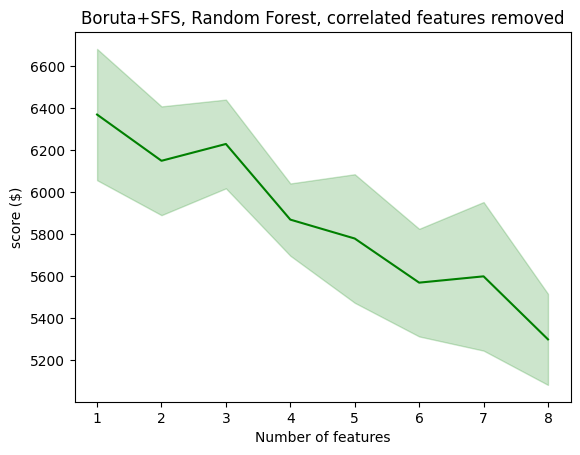

In [57]:
means = np.mean(results_boruta_nocorr_RF, axis=0)
std = np.std(results_boruta_nocorr_RF, axis=0)
# results_dict["scores_list_xgboost_rfe_means"] = means
# results_dict["scores_list_xgboost_rfe_std"] = std
n_features_list = [8, 7, 6, 5, 4, 3, 2, 1]
plot_scores_2(n_features_list, means, std, color="green", plot_title="Boruta+SFS, Random Forest, correlated features removed")

In [58]:
print(means)
print(std)

[5300. 5600. 5570. 5780. 5870. 6230. 6150. 6370.]
[216.79483389 353.55339059 256.1249695  305.94117082 172.04650534
 211.18712082 258.84358211 312.40998704]


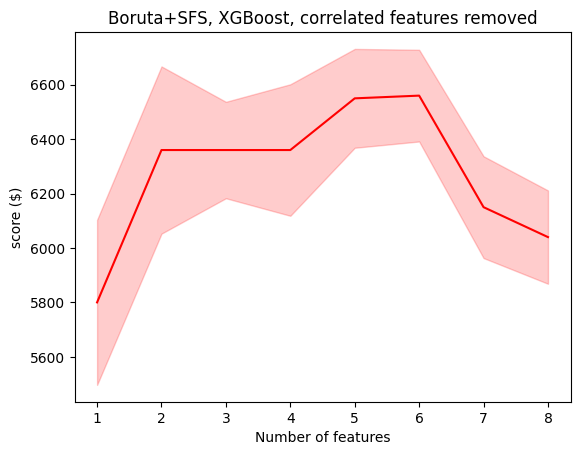

In [59]:
means = np.mean(results_boruta_nocorr_XGB, axis=0)
std = np.std(results_boruta_nocorr_XGB, axis=0)
# results_dict["scores_list_xgboost_rfe_means"] = means
# results_dict["scores_list_xgboost_rfe_std"] = std
n_features_list = [8, 7, 6, 5, 4, 3, 2, 1]
plot_scores_2(n_features_list, means, std, color="red", plot_title="Boruta+SFS, XGBoost, correlated features removed")

In [60]:
print(means)
print(std)

[6040. 6150. 6560. 6550. 6360. 6360. 6360. 5800.]
[171.46428199 187.08286934 168.52299546 181.65902125 241.66091947
 177.20045147 307.24582991 303.31501776]
